<a href="https://colab.research.google.com/github/naouar/BayesianOptimization/blob/master/Copy_of_stockdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [0]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [4]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
compilation time :  0.0213479995728


In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Instructions for updating:
Use tf.cast instead.
Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 7s 2ms/step - loss: 0.0026 - val_loss: 0.0014


yo


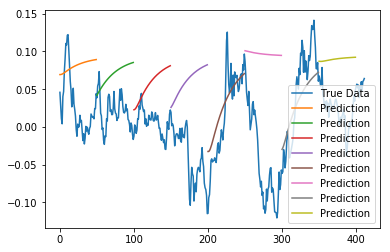

In [6]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [19]:
!pip install newsapi-python

In [23]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='545923a917bf4946a30361d95b216891')

# /v2/top-headlines
#top_headlines = newsapi.get_top_headlines(q='bitcoin',
 #                                         sources='bbc-news,the-verge',
  #                                        category='business',
   #                                       language='en',
    #                                      country='us')

# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                     sources='bbc-news,the-verge',
                                    domains='bbc.co.uk,techcrunch.com',
                                   from_param='2017-12-01',
                                  to='2017-12-12',
                                 language='en',
                                sort_by='relevancy',
                               page=2)

# /v2/sources
sources = newsapi.get_sources()
Need to talk to someone? Em

SyntaxError: ignored